# Capstone Project - Car Accident Severity Prediction

This is the notebook for car accident severity prediction project

In [3]:
import pandas as pd
import numpy as np

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [5]:
df_before = pd.read_csv('Data-Collisions.csv')

C:\Users\164916\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_before.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
df_before.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Introduction/Business Problem ##

 With an increasing number of car accidents happened in our community, a model is required to be developed in order to predict how severe an accident would be based on weather condition, road condition, location, etc. This project is focusing on developing a machine learning model to predict the severity of a car collision based on big dataset gathered from the community. 

## Data ##

### *Severity codes are as follows:*###

*0: Little to no Probability (Clear Conditions)*

*1: Very Low Probability — Chance or Property Damage*

*2: Low Probability — Chance of Injury*

*3: Mild Probability — Chance of Serious Injury*

*4: High Probability — Chance of Fatality*

### The original dataset has the following problems: ###

-- It has too many attributes (37)

-- It is an unbalanced dataset (SEVERITYCODE column)

###  So some changes are applied to this dataset: ###

-- The **independent variables** are changed to WEATHER, ROADCOND, LIGHTCOND

-- Balance the **dependent variables** SEVERITYCODE which now 1 and 2 categories have equal amount of data

## Data Conversion ##

 ### Deal with unbalanced SEVERITYCODE**###

In [8]:
df_before['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As we can see the SEVERITYCODE column is unbalanced and category '1' is nearly 3 times more
than the category '2'

In [9]:
from sklearn.utils import resample

df_before_maj = df_before[df_before.SEVERITYCODE==1]
df_before_min = df_before[df_before.SEVERITYCODE==2]

df_before_maj_upsampled = resample(df_before_maj, 
                                 replace=True,     # sample with replacement
                                 n_samples=58188,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
balanced_df = pd.concat([df_before_maj_upsampled, df_before_min])
balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

#### Now the dataset is balanced! ####

### Deal with too many attributes**###

In [10]:
df = pd.DataFrame(df_before[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']])
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [11]:
df_before['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df_before['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [13]:
df_before['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [14]:
encoding_weather = {'WEATHER':{'Clear': 1, 'Partly Cloudy': 2, 'Overcast':3,  'Fog/Smog/Smoke':4, 'Severe Crosswind':5, 'Raining':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8, 'Snowing':9,'Other':10,'Unknown':11}}
df.replace(encoding_weather, inplace=True)
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3.0,Wet,Daylight
1,1,6.0,Wet,Dark - Street Lights On
2,1,3.0,Dry,Daylight
3,1,1.0,Dry,Daylight
4,2,6.0,Wet,Daylight


In [15]:
encoding_roadcond = {'ROADCOND':{'Dry': 1, 'Sand/Mud/Dirt':2, 'Oil':3, 'Wet':4,'Standing Water':5,'Snow/Slush':6,'Ice':7,'Other':8,'Unknown':9}}
df.replace(encoding_roadcond, inplace=True)
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3.0,4.0,Daylight
1,1,6.0,4.0,Dark - Street Lights On
2,1,3.0,1.0,Daylight
3,1,1.0,1.0,Daylight
4,2,6.0,4.0,Daylight


In [16]:
encoding_lightcond = {'LIGHTCOND':{'Daylight':1, 'Dawn':2, 'Dusk':3, 'Dark - Street Lights On':4, 'Dark - Street Lights Off':5, 'Dark - No Street Lights':6, 'Dark - Unknown Lighting':7, 'Other':8,'Unknown':9 }}
df.replace(encoding_lightcond, inplace=True)
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3.0,4.0,1.0
1,1,6.0,4.0,4.0
2,1,3.0,1.0,1.0
3,1,1.0,1.0,1.0
4,2,6.0,4.0,1.0


In [30]:
df.isnull().sum()

SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

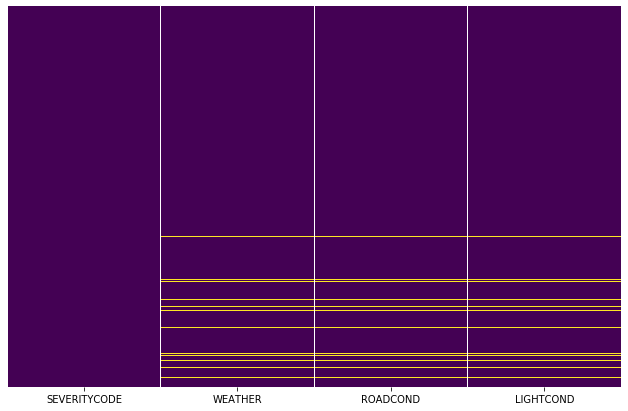

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(11,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()
plt.savefig("New_Null_data.png")

We have null data in our dataset we can get rid of the null data and proceed

In [36]:
df_new = df
df_new.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3.0,4.0,1.0
1,1,6.0,4.0,4.0
2,1,3.0,1.0,1.0
3,1,1.0,1.0,1.0
4,2,6.0,4.0,1.0


In [37]:
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [40]:
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df['ROADCOND'].isnull().value_counts()

False    189337
Name: ROADCOND, dtype: int64

In [47]:
df['WEATHER'].isnull().value_counts()

False    189337
Name: WEATHER, dtype: int64

In [45]:
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [46]:
df['LIGHTCOND'].isnull().value_counts()

False    189337
Name: LIGHTCOND, dtype: int64

In [52]:
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,3.0,4.0,1.0
1,1,6.0,4.0,4.0
2,1,3.0,1.0,1.0
3,1,1.0,1.0,1.0
4,2,6.0,4.0,1.0


#### Splitting dataset into Attributes and Target Variables 

In [50]:
X = df.drop('SEVERITYCODE',axis=1)
y = df['SEVERITYCODE']

In [53]:
X.head()

,WEATHER,ROADCOND,LIGHTCOND
0,3.0,4.0,1.0
1,6.0,4.0,4.0
2,3.0,1.0,1.0
3,1.0,1.0,1.0
4,6.0,4.0,1.0


In [55]:
y.head()

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

## Normalize the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [56]:
X = StandardScaler().fit(X).transform(X)

In [57]:
X[0:5]

array([[-0.01750111,  0.65036952, -0.6551748 ],
       [ 0.96073359,  0.65036952,  0.66729801],
       [-0.01750111, -0.61604977, -0.6551748 ],
       [-0.66965757, -0.61604977, -0.6551748 ],
       [ 0.96073359,  0.65036952, -0.6551748 ]])

### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print("Testing data:", X_test.shape, y_test.shape )
print("Training data:", X_train.shape, y_train.shape )

Testing data: (56802, 3) (56802,)
Training data: (132535, 3) (132535,)


# METHODOLOGY

As our data is has a categorical target value It comes under a classification problem and we will choose K-Nearest Neighbour, Decision Tree and Logistic Regression Model

# k-NN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=25**

In [61]:
knn = KNeighborsClassifier(n_neighbors=25)

**Fit this KNN model to the training data.**

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [63]:
k_predict = knn.predict(X_test)

## Evaluating the Results for k-NN

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,jaccard_similarity_score,f1_score

In [73]:
print(jaccard_similarity_score(y_test,k_predict))

0.7015598042322454


C:\Users\164916\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [74]:
print(f1_score(y_test,k_predict))

0.8246042421107087


In [86]:
print(confusion_matrix(y_test,k_predict))

[[39849     0]
 [16952     1]]


In [87]:
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     39849
           2       1.00      0.00      0.00     16953

    accuracy                           0.70     56802
   macro avg       0.85      0.50      0.41     56802
weighted avg       0.79      0.70      0.58     56802



# Decission Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree**

In [76]:
dtree = DecisionTreeClassifier()

**Fit this model to the training data.**

In [77]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
dtree_pred = dtree.predict(X_test)

## Evaluating the Results for Decision Tree

In [79]:
print(jaccard_similarity_score(y_test,dtree_pred))

0.7012957290236259


C:\Users\164916\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [80]:
print(f1_score(y_test,dtree_pred))

0.8243781763981327


In [88]:
print(confusion_matrix(y_test,dtree_pred))

[[39822    27]
 [16940    13]]


In [89]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     39849
           2       0.33      0.00      0.00     16953

    accuracy                           0.70     56802
   macro avg       0.51      0.50      0.41     56802
weighted avg       0.59      0.70      0.58     56802



# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr_pred = lr.predict(X_test)

## Evaluating the Results for Logistic Regression

In [84]:
print(jaccard_similarity_score(y_test,lr_pred))

0.7015421992183374


C:\Users\164916\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [85]:
print(f1_score(y_test,lr_pred))

0.8245957103392619


In [90]:
print(confusion_matrix(y_test,lr_pred))

[[39849     0]
 [16953     0]]


In [91]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     39849
           2       0.00      0.00      0.00     16953

    accuracy                           0.70     56802
   macro avg       0.35      0.50      0.41     56802
weighted avg       0.49      0.70      0.58     56802



C:\Users\164916\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results and Discussion

In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

# Conclusion

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2)